In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle

from utils import *

In [8]:
#selected subset of dates. 
val_dates = ['171021','171023','180711','180714']
test_dates = ['171020','171022','180712', '180713']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
#load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/'
load_path = '/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Goose_all_Jester_all_2/'
# save_path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_2_upsample'
model_saving_path = '/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Goose_all_Jester_all_2/LR_models'
CH = 23

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=256,CH = CH)

In [9]:
len(train_loader), len(val_loader), len(test_loader)

(251, 24, 25)

In [10]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([256, 1, 100, 10])
torch.Size([256, 1])
256
256
256


date:180413, rec:006, time:4462.0, label:1.0
date:180411, rec:004, time:4568.0, label:1.0
date:180327, rec:008, time:5813.0, label:0.0


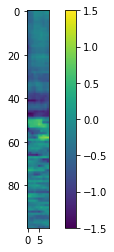

date:180410, rec:002, time:982.0, label:1.0
date:180331, rec:001, time:1230.0, label:0.0


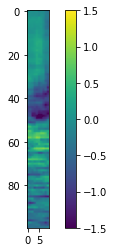

date:180322, rec:005, time:2442.0, label:1.0
date:180325, rec:002, time:6709.0, label:1.0
date:180412, rec:006, time:3808.0, label:0.0


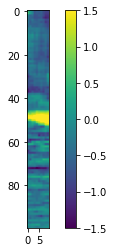

date:180330, rec:004, time:5471.0, label:1.0
date:180327, rec:006, time:1280.0, label:1.0
date:180330, rec:009, time:4761.0, label:0.0


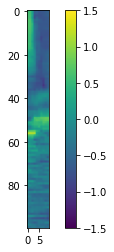

date:180414, rec:007, time:6108.0, label:0.0


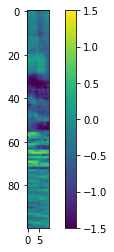

date:180329, rec:004, time:1523.0, label:1.0
date:180327, rec:004, time:4154.0, label:1.0
date:180413, rec:001, time:6367.0, label:0.0


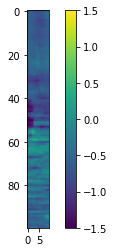

date:180413, rec:007, time:5845.0, label:1.0
date:180401, rec:001, time:100.0, label:0.0


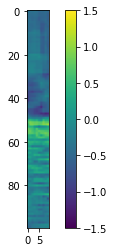

date:180401, rec:001, time:1260.0, label:0.0


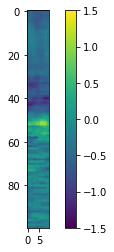

date:180331, rec:003, time:5308.0, label:1.0
date:180409, rec:006, time:2421.0, label:0.0


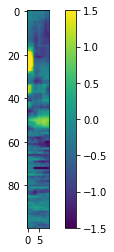

date:180411, rec:005, time:7124.0, label:1.0
date:180411, rec:002, time:900.0, label:1.0
date:180331, rec:007, time:2087.0, label:0.0


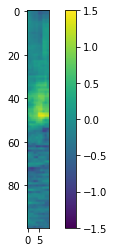

date:180330, rec:004, time:860.0, label:1.0
date:180414, rec:007, time:5878.0, label:0.0


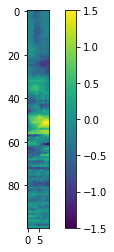

date:180325, rec:006, time:1818.0, label:1.0
date:180323, rec:004, time:4609.0, label:1.0
date:180330, rec:008, time:6535.0, label:0.0


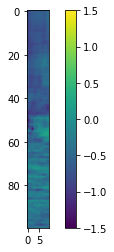

date:180413, rec:002, time:5671.0, label:0.0


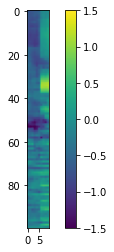

date:180409, rec:006, time:7028.0, label:0.0


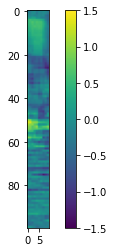

date:180329, rec:002, time:5825.0, label:1.0
date:180401, rec:001, time:7053.0, label:1.0
date:180413, rec:001, time:2940.0, label:0.0


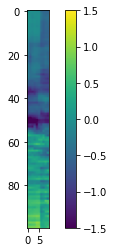

date:180330, rec:008, time:3586.0, label:0.0


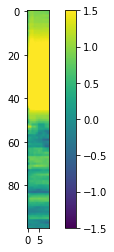

date:180329, rec:001, time:350.0, label:0.0


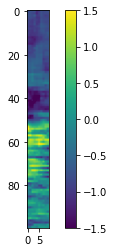

date:180329, rec:006, time:1784.0, label:1.0
date:180413, rec:001, time:6907.0, label:0.0


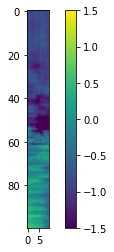

date:180327, rec:007, time:1270.0, label:0.0


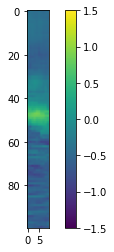

date:180409, rec:005, time:4080.0, label:1.0
date:180411, rec:005, time:5477.0, label:1.0
date:180331, rec:007, time:6058.0, label:0.0


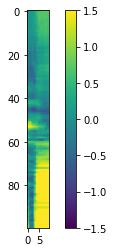

date:180329, rec:002, time:189.0, label:1.0
date:180410, rec:006, time:5742.0, label:0.0


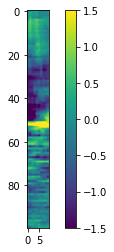

date:180325, rec:001, time:1640.0, label:0.0


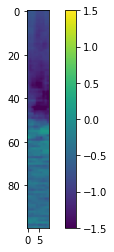

date:180414, rec:001, time:180.0, label:0.0


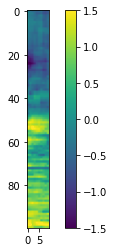

date:180330, rec:003, time:5062.0, label:1.0
date:180325, rec:009, time:2230.0, label:0.0


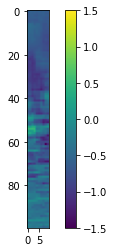

date:180410, rec:005, time:5147.0, label:1.0
date:180331, rec:007, time:6858.0, label:0.0


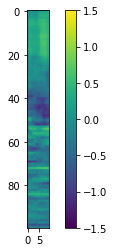

date:180411, rec:006, time:5885.0, label:1.0
date:180410, rec:005, time:6562.0, label:1.0
date:180413, rec:004, time:1145.0, label:0.0


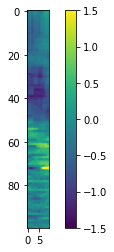

date:180330, rec:003, time:1473.0, label:1.0
date:180329, rec:005, time:1715.0, label:1.0
date:180330, rec:009, time:6391.0, label:0.0


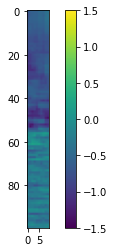

date:180327, rec:007, time:4160.0, label:0.0


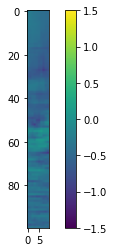

date:180322, rec:003, time:883.0, label:1.0
date:180324, rec:006, time:892.0, label:1.0
date:180325, rec:007, time:2323.0, label:1.0
date:180413, rec:002, time:5511.0, label:0.0


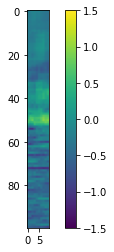

date:180325, rec:003, time:6377.0, label:1.0
date:180411, rec:007, time:830.0, label:0.0


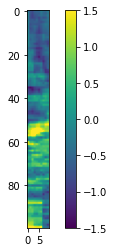

date:180410, rec:005, time:1548.0, label:0.0


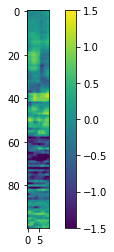

date:180329, rec:004, time:1643.0, label:1.0
date:180331, rec:001, time:1150.0, label:0.0


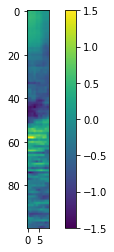

date:180414, rec:001, time:2020.0, label:0.0


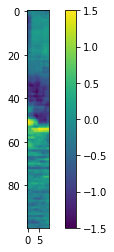

date:180413, rec:002, time:6411.0, label:0.0


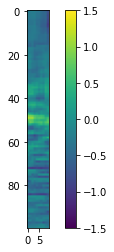

date:180411, rec:006, time:2452.0, label:1.0
date:180327, rec:008, time:1117.0, label:1.0
date:180324, rec:006, time:3859.0, label:1.0
date:180330, rec:008, time:3406.0, label:0.0


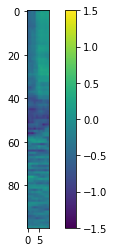

date:180411, rec:004, time:3203.0, label:1.0
date:180413, rec:001, time:1180.0, label:0.0


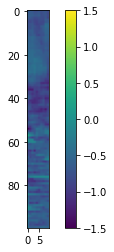

date:180331, rec:007, time:5408.0, label:0.0


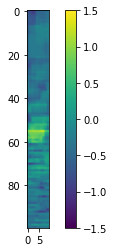

date:180412, rec:003, time:1956.0, label:1.0
date:180324, rec:008, time:2448.0, label:0.0


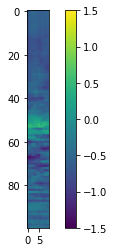

date:180410, rec:006, time:5552.0, label:0.0


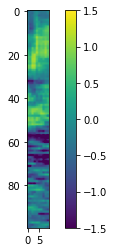

date:180411, rec:006, time:5412.0, label:0.0


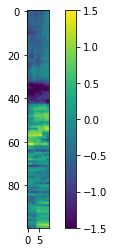

date:180324, rec:005, time:2904.0, label:1.0
date:180413, rec:002, time:50.0, label:0.0


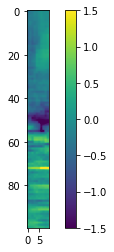

date:180327, rec:001, time:810.0, label:0.0


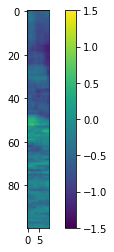

date:180331, rec:001, time:3314.0, label:1.0
date:180327, rec:005, time:6078.0, label:0.0


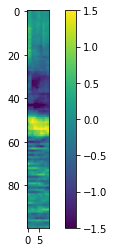

date:180411, rec:006, time:6454.0, label:0.0


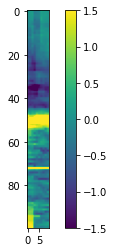

date:180410, rec:006, time:3999.0, label:1.0
date:180327, rec:008, time:2862.0, label:0.0


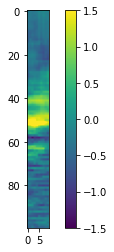

date:180324, rec:001, time:6537.0, label:1.0
date:180323, rec:007, time:2965.0, label:0.0


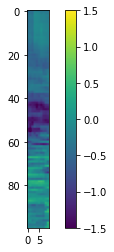

date:180413, rec:008, time:2245.0, label:1.0
date:180412, rec:001, time:4758.0, label:1.0
date:180325, rec:001, time:2120.0, label:0.0


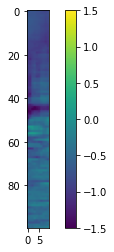

date:180413, rec:001, time:1210.0, label:0.0


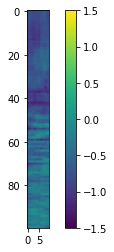

date:180410, rec:006, time:1296.0, label:1.0
date:180330, rec:008, time:2896.0, label:0.0


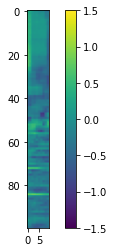

date:180329, rec:001, time:5759.0, label:1.0
date:180329, rec:001, time:1350.0, label:0.0


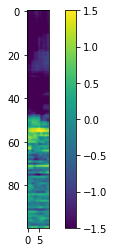

date:180322, rec:005, time:7049.0, label:1.0
date:180413, rec:004, time:650.0, label:0.0


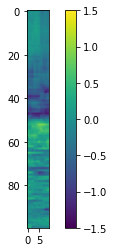

date:180323, rec:003, time:1007.0, label:1.0
date:180331, rec:003, time:6791.0, label:1.0
date:180324, rec:001, time:660.0, label:0.0


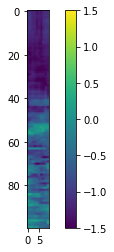

date:180411, rec:006, time:5422.0, label:0.0


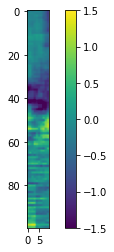

date:180414, rec:007, time:4758.0, label:0.0


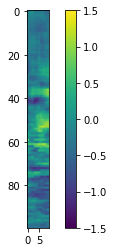

date:180327, rec:007, time:4931.0, label:0.0


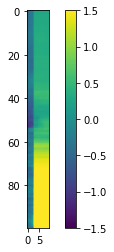

date:180413, rec:003, time:990.0, label:0.0


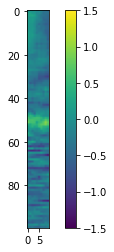

date:180327, rec:007, time:4190.0, label:0.0


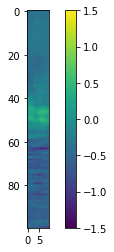

date:180330, rec:009, time:5761.0, label:0.0


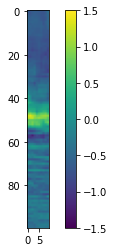

date:180410, rec:002, time:7110.0, label:1.0
date:180413, rec:003, time:1833.0, label:0.0


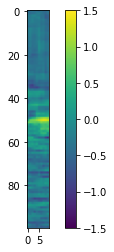

date:180324, rec:003, time:2129.0, label:1.0
date:180323, rec:002, time:380.0, label:1.0
date:180329, rec:006, time:5201.0, label:1.0
date:180329, rec:001, time:4932.0, label:1.0
date:180411, rec:006, time:3931.0, label:1.0
date:180411, rec:003, time:3263.0, label:1.0
date:180414, rec:007, time:5698.0, label:0.0


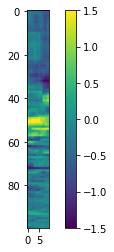

date:180329, rec:006, time:1644.0, label:1.0
date:180322, rec:007, time:4500.0, label:0.0


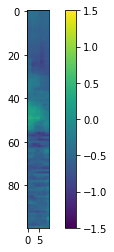

date:180327, rec:008, time:50.0, label:0.0


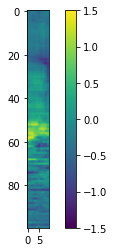

date:180322, rec:004, time:4709.0, label:1.0
date:180409, rec:003, time:3189.0, label:1.0
date:180325, rec:005, time:233.0, label:0.0


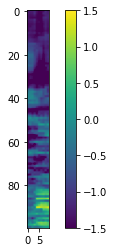

date:180413, rec:001, time:5716.0, label:0.0


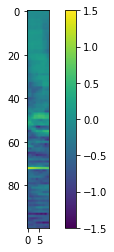

date:180330, rec:001, time:6826.0, label:1.0
date:180324, rec:008, time:3613.0, label:0.0


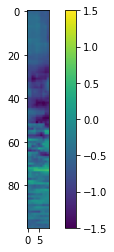

date:180330, rec:008, time:7035.0, label:0.0


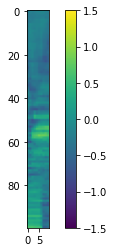

date:180330, rec:003, time:4324.0, label:1.0
date:180327, rec:001, time:2260.0, label:0.0


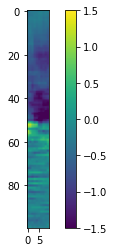

In [5]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}, label:{}'.format(date[i], rec[i], time[i], label[i][0].numpy()))
        if label[i][0].numpy() == 0.0:
            data_sub = data[i][0]
            plt.imshow(data_sub)
            plt.clim(-1.5, 1.5)
            plt.colorbar()
            plt.show()
    break

### Logistic regression with no regularization

In [10]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'
CH = 23
timewindow = 10



Train loss for epoch 0: 0.5324787497520447
Val loss for epoch 0: 0.5514164566993713
Train loss for epoch 1: 0.512535810470581
Val loss for epoch 1: 0.511681318283081
1
Train loss for epoch 2: 0.5065385699272156
Val loss for epoch 2: 0.4963194727897644
2
Train loss for epoch 3: 0.5026339888572693
Val loss for epoch 3: 0.49446091055870056
3
Train loss for epoch 4: 0.5010033249855042
Val loss for epoch 4: 0.4709554612636566
4
Train loss for epoch 5: 0.4998617172241211
Val loss for epoch 5: 0.4718663692474365
Train loss for epoch 6: 0.49883198738098145
Val loss for epoch 6: 0.4666067957878113
6
Train loss for epoch 7: 0.497972697019577
Val loss for epoch 7: 0.463077574968338
7
Train loss for epoch 8: 0.4974648952484131
Val loss for epoch 8: 0.46280422806739807
8
Train loss for epoch 9: 0.4970974922180176
Val loss for epoch 9: 0.47502201795578003
Train loss for epoch 10: 0.496695876121521
Val loss for epoch 10: 0.4602464437484741
10
Train loss for epoch 11: 0.4966602623462677
Val loss for e

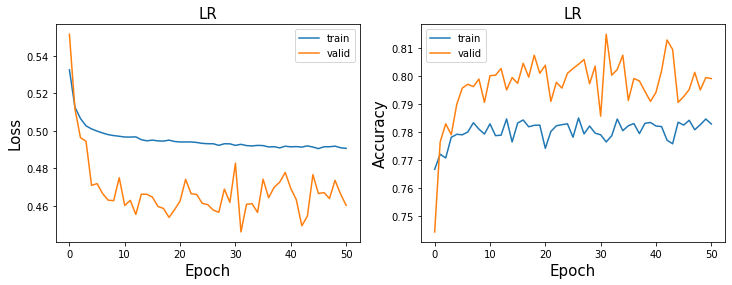

Train loss for epoch 0: 0.5320391654968262
Val loss for epoch 0: 0.5491220355033875
Train loss for epoch 1: 0.5131856799125671
Val loss for epoch 1: 0.5146564245223999
1
Train loss for epoch 2: 0.5063542127609253
Val loss for epoch 2: 0.5098180770874023
2
Train loss for epoch 3: 0.5029006600379944
Val loss for epoch 3: 0.47377052903175354
3
Train loss for epoch 4: 0.5020297765731812
Val loss for epoch 4: 0.4816942512989044
Train loss for epoch 5: 0.4989650249481201
Val loss for epoch 5: 0.46638980507850647
5
Train loss for epoch 6: 0.4991215467453003
Val loss for epoch 6: 0.4751208424568176
Train loss for epoch 7: 0.4984375834465027
Val loss for epoch 7: 0.4588342010974884
7
Train loss for epoch 8: 0.4974086582660675
Val loss for epoch 8: 0.4726943075656891
Train loss for epoch 9: 0.49718156456947327
Val loss for epoch 9: 0.4532349109649658
9
Train loss for epoch 10: 0.49632230401039124
Val loss for epoch 10: 0.4591672420501709
Train loss for epoch 11: 0.4963876008987427
Val loss for e

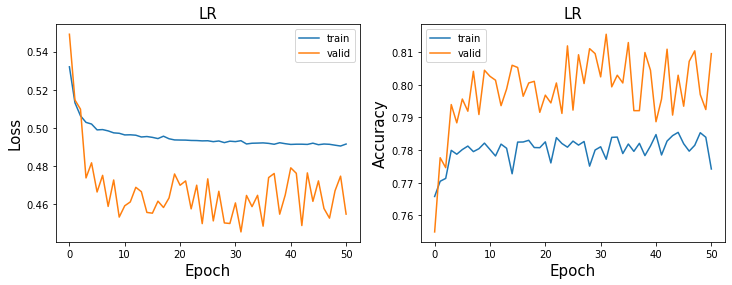

Train loss for epoch 0: 0.5322094559669495
Val loss for epoch 0: 0.5610877871513367
Train loss for epoch 1: 0.5131551027297974
Val loss for epoch 1: 0.5027780532836914
1
Train loss for epoch 2: 0.5066292881965637
Val loss for epoch 2: 0.48593613505363464
2
Train loss for epoch 3: 0.5032923817634583
Val loss for epoch 3: 0.47636720538139343
3
Train loss for epoch 4: 0.5013421773910522
Val loss for epoch 4: 0.46662700176239014
4
Train loss for epoch 5: 0.49993661046028137
Val loss for epoch 5: 0.468609482049942
Train loss for epoch 6: 0.49858856201171875
Val loss for epoch 6: 0.4639233946800232
6
Train loss for epoch 7: 0.4985083341598511
Val loss for epoch 7: 0.4582541882991791
7
Train loss for epoch 8: 0.49737244844436646
Val loss for epoch 8: 0.4599778354167938
Train loss for epoch 9: 0.4970289468765259
Val loss for epoch 9: 0.46049150824546814
Train loss for epoch 10: 0.496451199054718
Val loss for epoch 10: 0.4543054401874542
10
Train loss for epoch 11: 0.49675241112709045
Val loss 

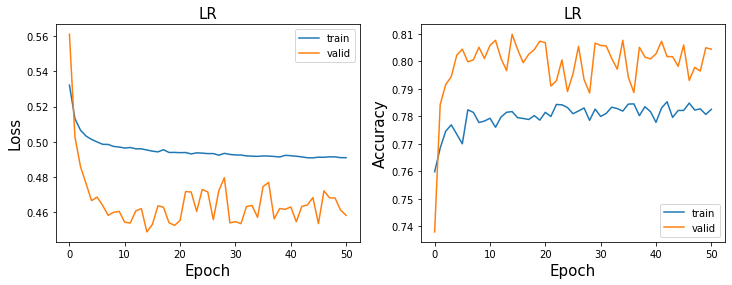

In [11]:
for a in alpha:
    model = GLM(input_dim=100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=a, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=a, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, a, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) 

In [18]:
reg_type

'none'

In [25]:
model_LR = os.listdir(model_saving_path)
results = []
for a in alpha:
    epoch_results = []
    reg_alpha = 'REG'+reg_type+str(a)+'_'
    for i, s in enumerate(model_LR):
        if '_CH23_' in s and reg_alpha in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            epoch_results.append(epoch_result)
            
    results.append([a, max(epoch_results)])
    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)

       epoch
alpha       
1         31
50        31
100       47


/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Goose_all_Jester_all_2/LR_models/LR_CH23_LOSSbce_REGnone1_EPOCH31_REDUCEsum.pt


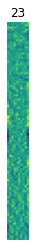

validation loss:0.4461635649204254 accuracy:0.8148336727766463
0.8616769
date:180714, rec:006, time:792.0, label:1.0
Original data 62 CH


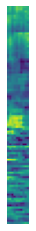

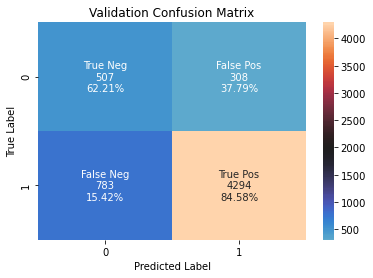

/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Goose_all_Jester_all_2/LR_models/LR_CH23_LOSSbce_REGnone50_EPOCH31_REDUCEsum.pt


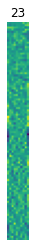

validation loss:0.44545698165893555 accuracy:0.8155125594025797
0.8616769
date:180714, rec:006, time:792.0, label:1.0
Original data 62 CH


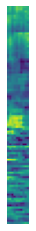

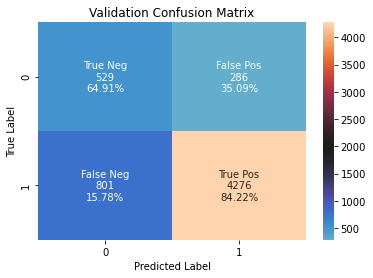

/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Goose_all_Jester_all_2/LR_models/LR_CH23_LOSSbce_REGnone100_EPOCH47_REDUCEsum.pt


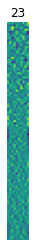

validation loss:0.4512477219104767 accuracy:0.8070264765784114
0.8616769
date:180714, rec:006, time:792.0, label:1.0
Original data 62 CH


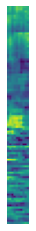

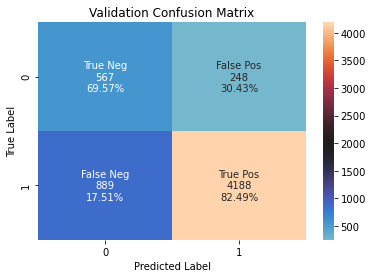

In [26]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, 10)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}_REDUCEsum.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Confusion matrix
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()

### Logistic regression with L2 regularization

In [28]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'
CH = 23

model = GLM(100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

Train loss for epoch 0: 0.5328947305679321
Val loss for epoch 0: 0.5498853921890259
Train loss for epoch 1: 0.516518235206604
Val loss for epoch 1: 0.5202362537384033
1
Train loss for epoch 2: 0.5089190602302551
Val loss for epoch 2: 0.5108249187469482
2
Train loss for epoch 3: 0.5068085193634033
Val loss for epoch 3: 0.48300665616989136
3
Train loss for epoch 4: 0.5055440068244934
Val loss for epoch 4: 0.46690741181373596
4
Train loss for epoch 5: 0.5038554072380066
Val loss for epoch 5: 0.48883897066116333
Train loss for epoch 6: 0.5036863088607788
Val loss for epoch 6: 0.4743121266365051
Train loss for epoch 7: 0.5031623840332031
Val loss for epoch 7: 0.449805349111557
7
Train loss for epoch 8: 0.5027654767036438
Val loss for epoch 8: 0.4813790023326874
Train loss for epoch 9: 0.5022416114807129
Val loss for epoch 9: 0.45799967646598816
Train loss for epoch 10: 0.5036391615867615
Val loss for epoch 10: 0.4639494717121124
Train loss for epoch 11: 0.502053439617157
Val loss for epoch 

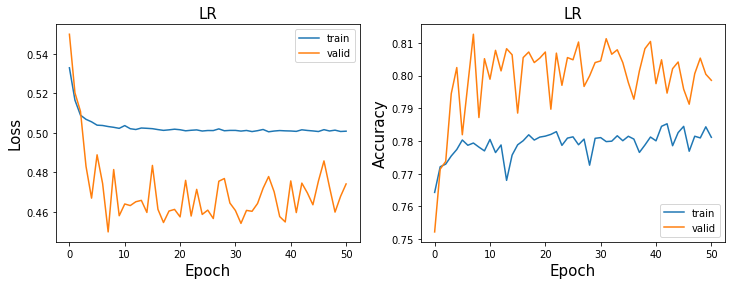

Train loss for epoch 0: 0.5989652872085571
Val loss for epoch 0: 0.5974276661872864
Train loss for epoch 1: 0.5763601064682007
Val loss for epoch 1: 0.5463754534721375
1
Train loss for epoch 2: 0.5745732188224792
Val loss for epoch 2: 0.5411161184310913
2
Train loss for epoch 3: 0.5740866661071777
Val loss for epoch 3: 0.5240917801856995
3
Train loss for epoch 4: 0.5741770267486572
Val loss for epoch 4: 0.527643084526062
Train loss for epoch 5: 0.5747154951095581
Val loss for epoch 5: 0.5288299322128296
Train loss for epoch 6: 0.573889970779419
Val loss for epoch 6: 0.5358240604400635
Train loss for epoch 7: 0.5743799805641174
Val loss for epoch 7: 0.5088049173355103
7
Train loss for epoch 8: 0.5732466578483582
Val loss for epoch 8: 0.5251210927963257
Train loss for epoch 9: 0.573652982711792
Val loss for epoch 9: 0.5258317589759827
Train loss for epoch 10: 0.5741880536079407
Val loss for epoch 10: 0.512757420539856
Train loss for epoch 11: 0.5736892223358154
Val loss for epoch 11: 0.5

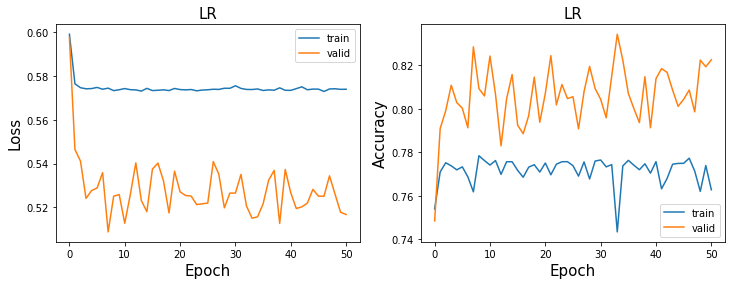

Train loss for epoch 0: 0.6403509974479675
Val loss for epoch 0: 0.6089474558830261
Train loss for epoch 1: 0.6114174723625183
Val loss for epoch 1: 0.5762805938720703
1
Train loss for epoch 2: 0.6103713512420654
Val loss for epoch 2: 0.5775409936904907
Train loss for epoch 3: 0.6105961799621582
Val loss for epoch 3: 0.5660048127174377
3
Train loss for epoch 4: 0.6122588515281677
Val loss for epoch 4: 0.5740436911582947
Train loss for epoch 5: 0.6109887957572937
Val loss for epoch 5: 0.5622482895851135
5
Train loss for epoch 6: 0.6106394529342651
Val loss for epoch 6: 0.5755646228790283
Train loss for epoch 7: 0.6115875244140625
Val loss for epoch 7: 0.5635838508605957
Train loss for epoch 8: 0.6110543012619019
Val loss for epoch 8: 0.561152994632721
8
Train loss for epoch 9: 0.6101544499397278
Val loss for epoch 9: 0.5554789304733276
9
Train loss for epoch 10: 0.6121372580528259
Val loss for epoch 10: 0.5697358250617981
Train loss for epoch 11: 0.6113200187683105
Val loss for epoch 11

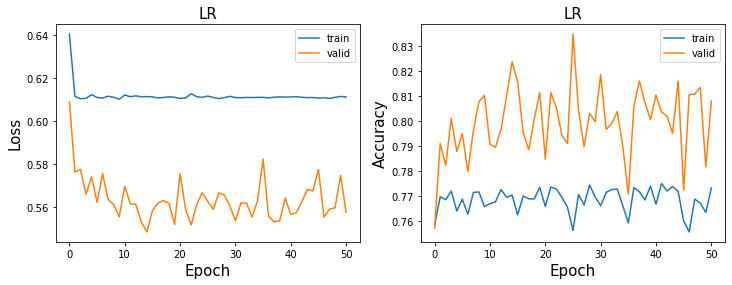

In [29]:
for alpha in alphas:
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []
    model = GLM(100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # reduction = 'sum', Goose_1st_2

In [30]:
model_LR = os.listdir(model_saving_path)
results = []
for alpha in alphas:
    epoch_results = []
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if '_CH23_' in s and reg_alpha in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            epoch_results.append(epoch_result)
            
    results.append([alpha, max(epoch_results)])
    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)

       epoch
alpha       
1          7
50         7
100       14


/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Goose_all_Jester_all_2/LR_models/LR_CH23_LOSSbce_REGl21_EPOCH7_REDUCEsum.pt


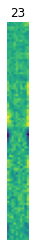

validation loss:0.449805349111557 accuracy:0.8126272912423625
0.8616769
date:180714, rec:006, time:792.0, label:1.0
Original data 62 CH


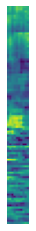

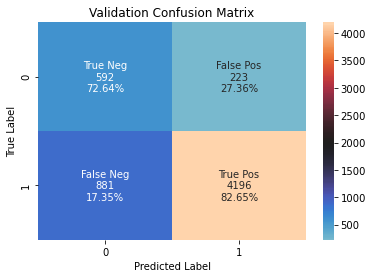

/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Goose_all_Jester_all_2/LR_models/LR_CH23_LOSSbce_REGl250_EPOCH7_REDUCEsum.pt


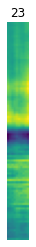

validation loss:0.5088049173355103 accuracy:0.8284114052953157
0.8616769
date:180714, rec:006, time:792.0, label:1.0
Original data 62 CH


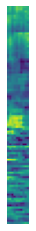

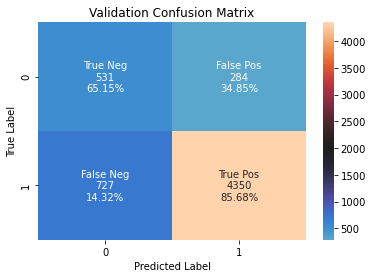

/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Goose_all_Jester_all_2/LR_models/LR_CH23_LOSSbce_REGl2100_EPOCH14_REDUCEsum.pt


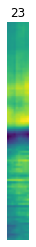

validation loss:0.5484994053840637 accuracy:0.8236591989137814
0.8616769
date:180714, rec:006, time:792.0, label:1.0
Original data 62 CH


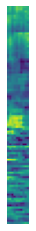

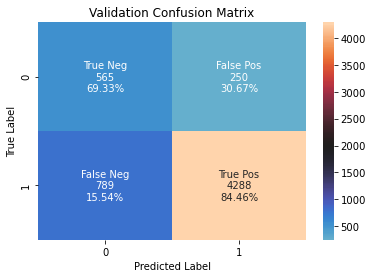

In [31]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, 10)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}_REDUCEsum.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Confusion matrix
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()

### Logistic Regression with finite difference regularization

In [11]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'
CH = 23
timewindow = 10

In [ ]:
for alpha in alphas:
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []
    model = GLM(100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

Train loss for epoch 0: 0.536630392074585
Val loss for epoch 0: 0.5470847487449646
Train loss for epoch 1: 0.5167658925056458
Val loss for epoch 1: 0.5156381130218506
1
Train loss for epoch 2: 0.5103481411933899
Val loss for epoch 2: 0.48940446972846985
2
Train loss for epoch 3: 0.5074053406715393
Val loss for epoch 3: 0.48748499155044556
3
Train loss for epoch 4: 0.5058929324150085
Val loss for epoch 4: 0.47708624601364136
4
Train loss for epoch 5: 0.5056098103523254
Val loss for epoch 5: 0.4623996615409851
5
Train loss for epoch 6: 0.5050278306007385
Val loss for epoch 6: 0.4733099639415741
Train loss for epoch 7: 0.5058738589286804
Val loss for epoch 7: 0.4569821357727051
7
Train loss for epoch 8: 0.5055314898490906
Val loss for epoch 8: 0.47184768319129944
Train loss for epoch 9: 0.5050994157791138
Val loss for epoch 9: 0.4693436920642853
Train loss for epoch 10: 0.5050452947616577
Val loss for epoch 10: 0.4652060568332672
Train loss for epoch 11: 0.5051054954528809
Val loss for ep

In [ ]:
model_LR = os.listdir(model_saving_path)
results = []
for alpha in alphas:
    epoch_results = []
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if '_CH23_' in s and reg_alpha in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            epoch_results.append(epoch_result)
            
    results.append([alpha, max(epoch_results)])
    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)

In [ ]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, 10)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}_REDUCEsum.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Confusion matrix
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()

### SVM without regularization

In [22]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0 
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'none' # expect to be bad, since predictions could be arbitrarily far from boundaries
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [13]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6105479598045349
Val loss for epoch 0: 1.2834664583206177
Train loss for epoch 1: 0.5602447986602783
Val loss for epoch 1: 0.9178999662399292
1
Train loss for epoch 2: 0.4674215018749237
Val loss for epoch 2: 3.1678149700164795
Train loss for epoch 3: 0.5240594744682312
Val loss for epoch 3: 0.9516066312789917
Train loss for epoch 4: 0.4172993004322052
Val loss for epoch 4: 1.5819454193115234
Train loss for epoch 5: 0.4704030156135559
Val loss for epoch 5: 1.1257431507110596
Train loss for epoch 6: 0.3469279408454895
Val loss for epoch 6: 1.4243940114974976
Train loss for epoch 7: 0.3866455554962158
Val loss for epoch 7: 1.1779205799102783
Train loss for epoch 8: 0.33019065856933594
Val loss for epoch 8: 1.365188479423523
Train loss for epoch 9: 0.3815663754940033
Val loss for epoch 9: 1.5121104717254639
Train loss for epoch 10: 0.40764206647872925
Val loss for epoch 10: 1.7473173141479492
Train loss for epoch 11: 0.3409585654735565
Val loss for epoch 11: 1.27

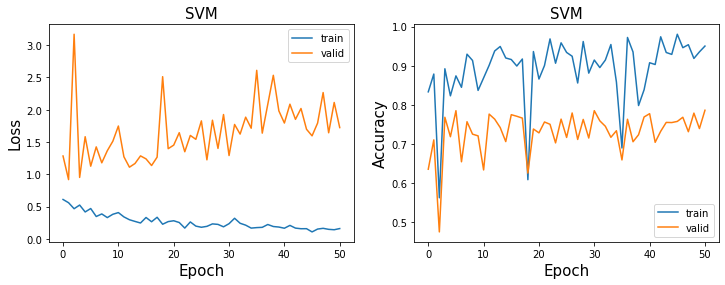

In [14]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [23]:
best_epoch = 1

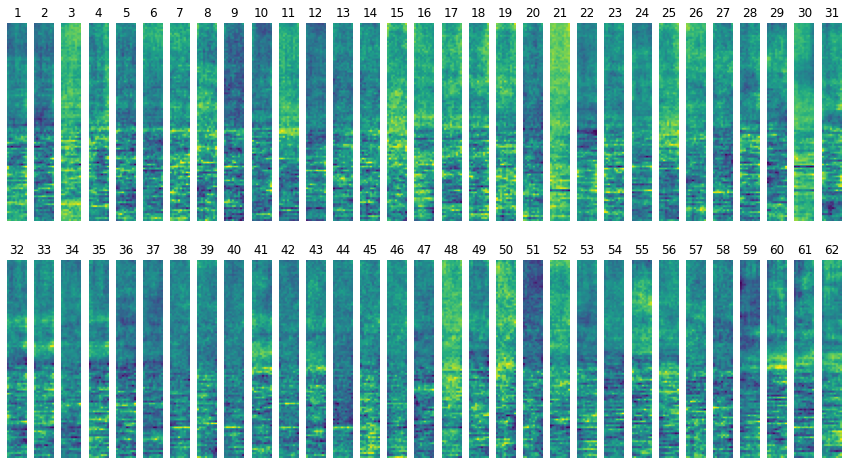

In [24]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [27]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_3 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.7428555488586426 accuracy:0.7838461538461539


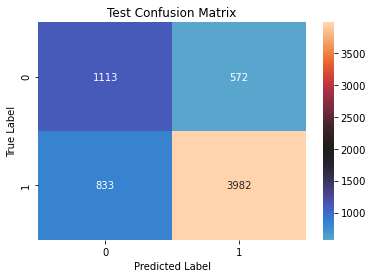

In [28]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


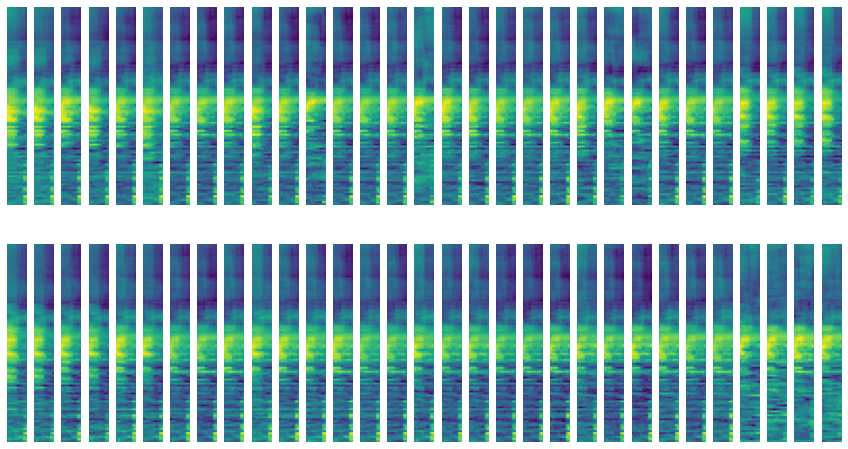

In [30]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_3[0][0], cases_wrong_3[0][1], cases_wrong_3[0][1], cases_wrong_3[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_3[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with L2 regularization

In [31]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5 # have special meaning as margin, corresponding to 1 in the hinge loss
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'l2'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [16]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.142331600189209
Val loss for epoch 0: 2.375016927719116
Train loss for epoch 1: 0.8872479200363159
Val loss for epoch 1: 0.9689788222312927
1
Train loss for epoch 2: 0.9464882612228394
Val loss for epoch 2: 1.0704563856124878
Train loss for epoch 3: 0.8319297432899475
Val loss for epoch 3: 1.3819953203201294
Train loss for epoch 4: 0.9815953969955444
Val loss for epoch 4: 2.2135136127471924
Train loss for epoch 5: 0.9559652209281921
Val loss for epoch 5: 1.3571209907531738
Train loss for epoch 6: 0.9480046629905701
Val loss for epoch 6: 0.958657443523407
6
Train loss for epoch 7: 0.8747104406356812
Val loss for epoch 7: 1.0527974367141724
Train loss for epoch 8: 0.938942551612854
Val loss for epoch 8: 1.816292405128479
Train loss for epoch 9: 1.033324956893921
Val loss for epoch 9: 1.2031350135803223
Train loss for epoch 10: 0.908989667892456
Val loss for epoch 10: 0.6989802718162537
10
Train loss for epoch 11: 0.9314482808113098
Val loss for epoch 11: 1.08010

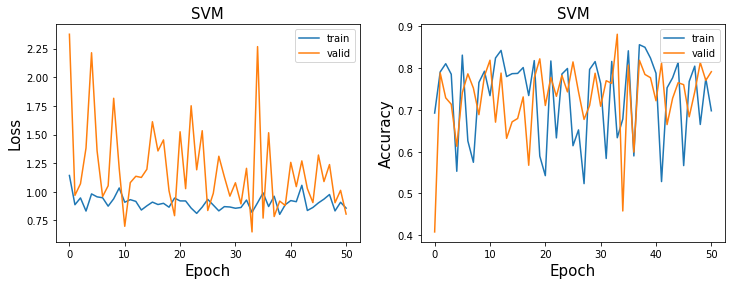

In [17]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [32]:
best_epoch = 33

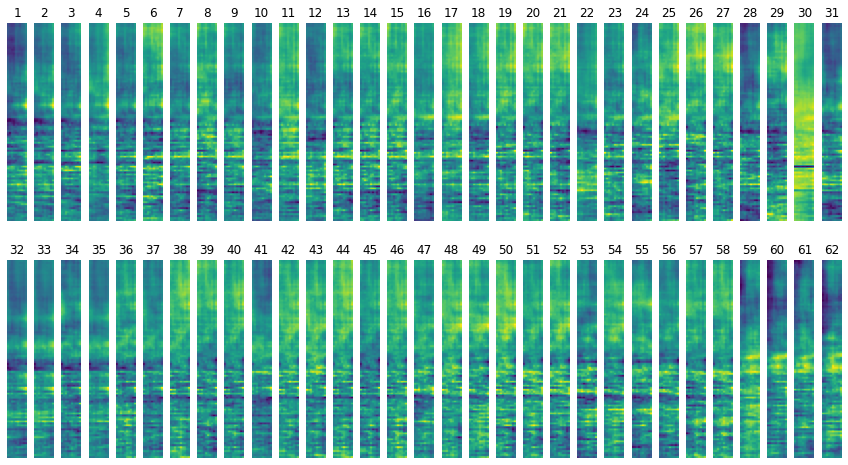

In [33]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [34]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_4 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:1.2684636116027832 accuracy:0.7512307692307693


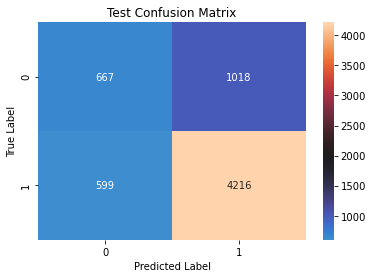

In [35]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


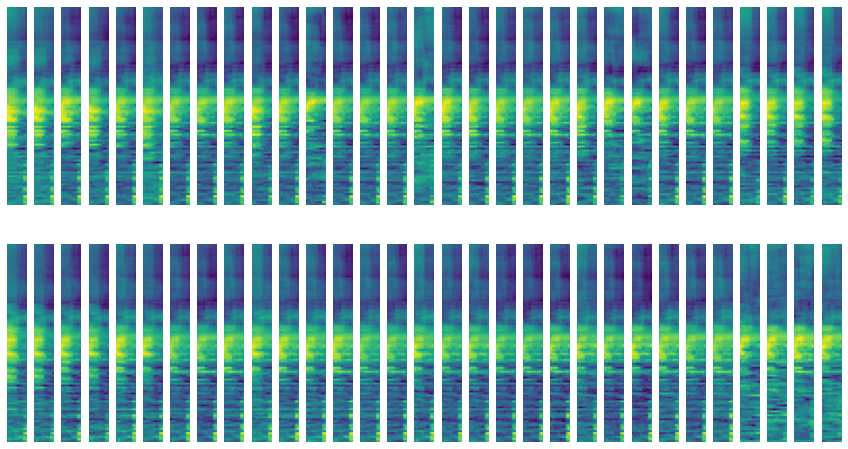

In [36]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_4[0][0], cases_wrong_4[0][1], cases_wrong_4[0][1], cases_wrong_4[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_4[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with finite difference regularization

In [37]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'finite_diff'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [19]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.1333791017532349
Val loss for epoch 0: 1.699452519416809
Train loss for epoch 1: 0.7799455523490906
Val loss for epoch 1: 1.1568527221679688
1
Train loss for epoch 2: 0.8088831305503845
Val loss for epoch 2: 1.5023279190063477
Train loss for epoch 3: 0.7681555151939392
Val loss for epoch 3: 1.125550389289856
3
Train loss for epoch 4: 0.779151201248169
Val loss for epoch 4: 0.9314382076263428
4
Train loss for epoch 5: 0.6864786744117737
Val loss for epoch 5: 1.0832509994506836
Train loss for epoch 6: 0.6971858739852905
Val loss for epoch 6: 1.0215011835098267
Train loss for epoch 7: 0.7639809250831604
Val loss for epoch 7: 1.7163935899734497
Train loss for epoch 8: 0.7523619532585144
Val loss for epoch 8: 1.3559271097183228
Train loss for epoch 9: 0.837641179561615
Val loss for epoch 9: 1.0237863063812256
Train loss for epoch 10: 0.7160231471061707
Val loss for epoch 10: 1.128845453262329
Train loss for epoch 11: 0.7040753364562988
Val loss for epoch 11: 3.2867

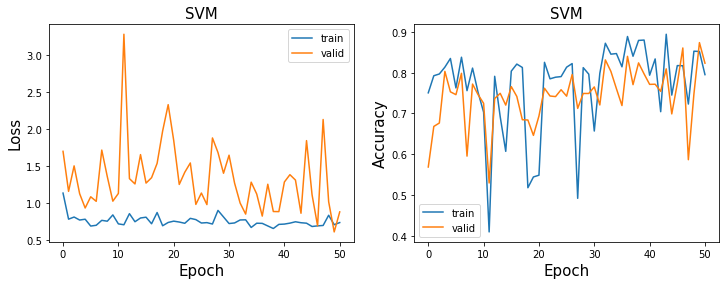

In [20]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [38]:
best_epoch = 49

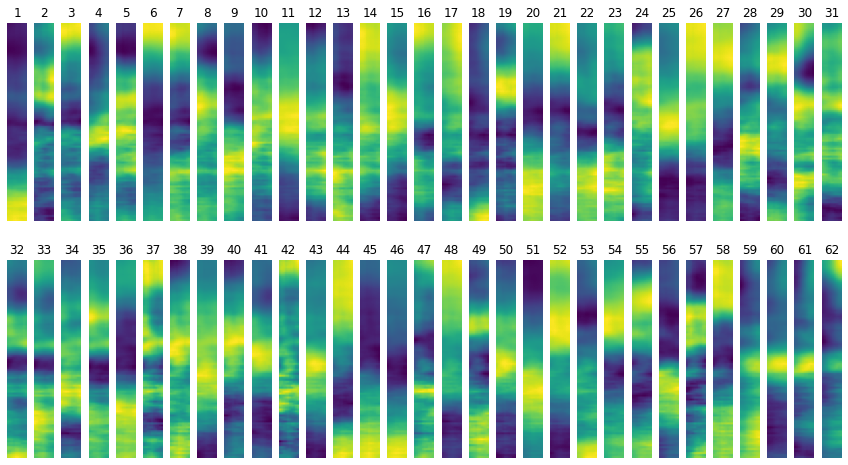

In [39]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [40]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_5 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.8956817984580994 accuracy:0.8355384615384616


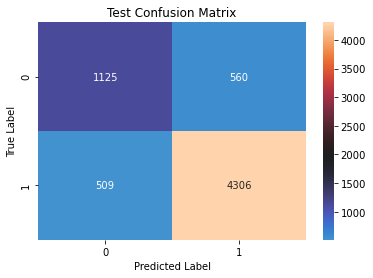

In [41]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


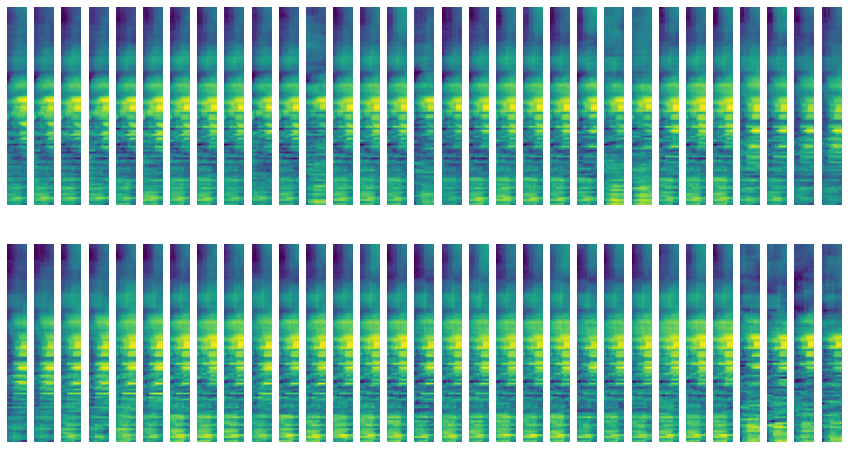

In [42]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_5[0][0], cases_wrong_5[0][1], cases_wrong_5[0][1], cases_wrong_5[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_5[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()